In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy import coordinates as coords
from astropy.time import Time
import astropy.units as u
import dunestyle.matplotlib as dunestyle


DUNE plot style enabled


/home/leoperes/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [93]:
# Constants
r_s = 20.0  # kpc #20.0
rho_0 = 0.184  # GeV/cm^3
R_sun = 8.122  # kpc

def rho_NFW(r):
    return rho_0 * (r_s / r) / (1 + r / r_s)**2

def r_galcen(l_deg, b_deg, s_kpc):
    l = np.radians(l_deg)
    b = np.radians(b_deg)
    x = R_sun - s_kpc * np.cos(b) * np.cos(l)
    y = -s_kpc * np.cos(b) * np.sin(l)
    z = s_kpc * np.sin(b)
    return np.sqrt(x**2 + y**2 + z**2)

def los_integral(l, b, s_max=50, steps=300):
    s_vals = np.linspace(0.01, s_max, steps)
    r_vals = r_galcen(l, b, s_vals)
    rho_vals = rho_NFW(r_vals)
    return np.trapz(rho_vals, s_vals)

# Grid
n_pix = 100
l_vals = np.linspace(-180, 180, n_pix)
b_vals = np.linspace(-90, 90, n_pix // 2)
L, B = np.meshgrid(l_vals, b_vals)

# Compute LOS integral
print("Computing LOS integrals...")
rho_proj = np.zeros_like(L)
Alt = np.zeros_like(L)
Azimuth = np.zeros_like(L)
for i in range(B.shape[0]):
    for j in range(L.shape[1]):
        rho_proj[i, j] = los_integral(L[i, j], B[i, j])

# Convert to radians
L_rad = np.radians(L)
B_rad = np.radians(B)
L_rad = np.where(L_rad > np.pi, L_rad - 2*np.pi, L_rad)




Computing LOS integrals...


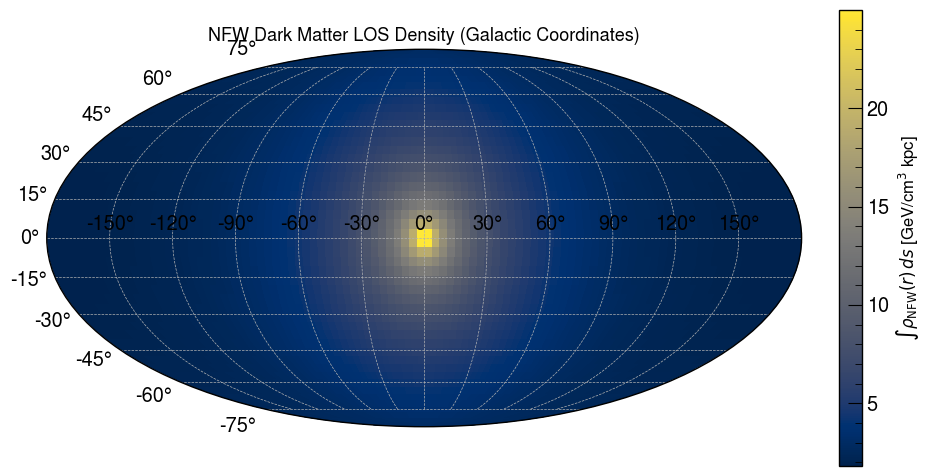

In [94]:
# Plot
fig = plt.figure(figsize=(10, 6))
ax = plt.subplot(111, projection='mollweide')

# Change colormap here: 'plasma', 'cividis', 'magma', 'coolwarm', etc.
cmap_choice = 'cividis'
pc = ax.pcolormesh(L_rad, B_rad, rho_proj, cmap=cmap_choice, shading='auto')

# Colorbar on the side
cbar = plt.colorbar(pc, ax=ax, orientation='vertical', pad=0.04, shrink=0.8)
cbar.set_label(r'$\int \rho_\mathrm{NFW}(r)\,ds$ [GeV/cm$^3$ kpc]', fontsize=12)

ax.set_title("NFW Dark Matter LOS Density (Galactic Coordinates)", fontsize=13)
ax.grid(True)

plt.tight_layout()
plt.show()